>**Alumnos**: *Adrián Ogáyar Sanchez y Arturo Barbero Pérez*

>**Grupo**: *11*

# Support Vector Machines

El objetivo de la primera parte de la práctica es familiarizarse con el uso del clasificador SVM que incorpora scikit-learn, para luego aplicarlo en la segunda parte de la práctica.

Comenzamos importando las librerías necesarias. Todas ellas han sido utilizadas y explicadas en prácticas anteriores, salvo **SVM** de **SciKit-Learn** que es el módulo que incorpora todos los algoritmos necesarios para las Support Vector Machines.

In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm as svm

## Kernel Lineal

Continuamos cargando los datos del fichero ex6data1.mat, ex6data2.mat y ex6data3.mat. Este fichero contiene una serie de datos de entrenamiento y datos de validación necesarios para la realización del apartado 1.3 que veremos posteriormente.

In [2]:
datos1 = loadmat("ex6data1.mat")
datos2 = loadmat("ex6data2.mat")
datos3 = loadmat("ex6data3.mat")

datos1_x = datos1['X']
datos1_y = datos1['y']
print(datos1_x.shape)
print(datos1_y.shape)

datos2_x = datos2['X']
datos2_y = datos2['y']
print(datos2_x.shape)
print(datos2_y.shape)

datos3_x = datos3['X']
datos3_y = datos3['y']
print(datos3_x.shape)
print(datos3_y.shape)

xval = datos3['Xval']
yval = datos3['yval']
print(xval.shape)
print(yval.shape)

(51, 2)
(51, 1)
(863, 2)
(863, 1)
(211, 2)
(211, 1)
(200, 2)
(200, 1)


Definimos una función que se va a encargar de realizar un gráfico para poder visualizar los datos. Esta función recibe la componente 'X' y la clasificacion 'y'.

In [3]:
def graficaDatos(x, y):
    plt.figure()
    
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    
    plt.scatter(x[pos, 0], x[pos, 1], color='black', marker='+')
    plt.scatter(x[neg, 0], x[neg, 1], color='yellow', edgecolors='black', marker='o')

    return

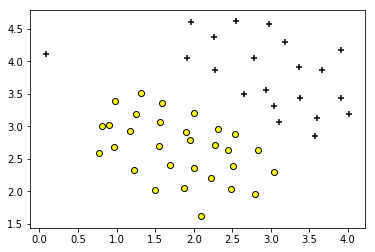

In [4]:
graficaDatos(datos1_x, datos1_y)

La clase *sklearn.svm.SVC* instancia un clasificador SVM utilizando el parámetro C de regularización y aplicando una función de kernel *kernel*. 

In [5]:
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(datos1_x, datos1_y.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Creamos una función que recibe el clasificador previamente entrenado y los datos de entrada. Este método se encarga de crear unas coordenadas que van desde los mínimos hasta los máximos de 'x' y realiza una predicción sobre estos datos. Devuelve las coordenadas y las predicciones realizadas.

In [6]:
def generarSeparacion(clf, x):

    x1 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
    x2 = np.linspace(x[:, 1].min(), x[:, 1].max(), 100)
    x1, x2 = np.meshgrid(x1, x2)
    
    yp = clf.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape)
    
    return (x1, x2, yp)

In [7]:
x1, x2, yp = generarSeparacion(clf, datos1_x)

Definiremos también una función encargada de completar la gráfica creada con *graficaDatos*. La completa añadiendo la frontera de decisión a esta. 

In [8]:
def graficaSeparacion(x, y, x1, x2, yp):
    
    graficaDatos(x,y)
    plt.contour(x1, x2, yp)
    
    return

### Resultado obtenido con C = 1

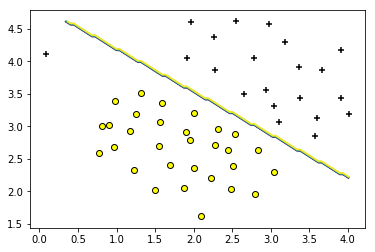

In [9]:
graficaSeparacion(datos1_x, datos1_y, x1, x2, yp)

### Resultado obtenido con C = 100

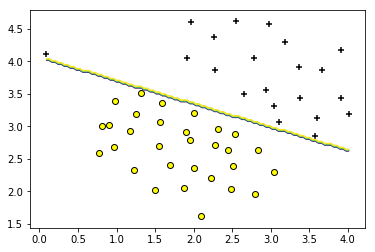

In [10]:
clf = svm.SVC(kernel='linear', C=100)

clf.fit(datos1_x, datos1_y.ravel())

x1, x2, yp = generarSeparacion(clf, datos1_x)

graficaSeparacion(datos1_x, datos1_y, x1, x2, yp)

Como podemos observar en las gráficas, el parámetro C funciona de manera contraria al parámetro $\lambda$ de las prácticas anteriores. Cuanto mayor es C, realiza una mejor separación entre los dos grupos de datos que tenemos, es decir, consigue que haya un menor *underfitting* y un mayor *overfitting* a los datos.
Sin embargo, cuanto menor es C, consigue que haya un mayor *underfitting* y un menor *overfitting*

## Kernel Gaussiano

A continuación utilizamos un kernel gaussiano para poder entrenar una SVM que clasifique correctamente el segundo conjunto de datos. 
Realizamos un proceso parecido al anterior, pero con los parametros: *kernel* = 'rbf' (equivalente a Gaussiano), *C* = 1, *gamma*= 1 / (2*sigma^2)*, donde *sigma* = 0.1

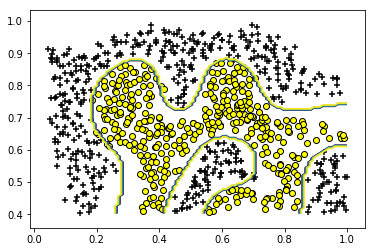

In [11]:
clf = svm.SVC(kernel='rbf', C=1, gamma=1/(2*0.1**2))

clf.fit(datos2_x, datos2_y.ravel())

x1, x2, yp = generarSeparacion(clf, datos2_x)

graficaSeparacion(datos2_x, datos2_y, x1, x2, yp)

## Elección de los parámetros $C$ y $\sigma$

En este caso tenemos que seleccionar los valores $C$ y $\sigma$ para el conjunto de datos de *ex6data3.mat*. Teniendo en este caso unos valores de validacion *Xval* e *yval*.

Para obtener los mejores valores de $C$ y $\sigma$ crearemos una función ***ajustarPorcentaje*** que reciba 2 vectores con los posibles valores de $C$ y de $\sigma$. Esta buscará la svm generada con los subconjuntos de estos parametros que tenga el mayor porcentaje de acierto respecto a los valores de validación, devolviendo una tupla $(C,\sigma)$ con los parametros ajustados.

In [12]:
def ajustarPorcentaje(C, Sigma, x, y, xval, yval) :
    mejorP = 0
    
    for c in C :
        for sigma in Sigma :
            clf = svm.SVC(kernel='rbf', C=c, gamma=1/(2*sigma**2))
            clf.fit(x, y)
            yv = clf.predict(xval)
            porcent = (100 * np.where(yv == yval)[0].size)/yval.size
            
            if(mejorP < porcent) :
                mejorP = porcent
                tup = (c,sigma)

    return tup

En este caso generamos un sólo vector que usaremos en ambos parámetros.

In [13]:
m = np.array([0.01,0.03,0.1,0.3,1,3,10,30])
ajustado = ajustarPorcentaje(m, m, datos3_x, datos3_y.ravel(), xval, yval.ravel())
print(ajustado)

(1.0, 0.1)


Finalmente mostramos la gráfica obtenida para comprobar que el resultado se ajusta a los valores deseados.

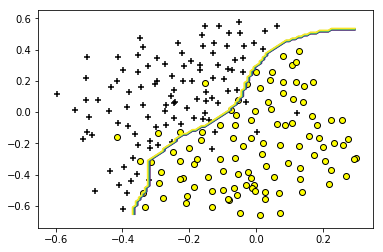

In [14]:
clf = svm.SVC(kernel='rbf', C=ajustado[0], gamma=1/(2*ajustado[1]**2))

clf.fit(datos3_x, datos3_y.ravel())

x1, x2, yp = generarSeparacion(clf, datos3_x)

graficaSeparacion(datos3_x, datos3_y, x1, x2, yp)

# Detección de spam

In [15]:
import codecs
import get_vocab_dict as vocabDic
import process_email as procEm

In [ ]:
# Spam / Easy / Hard
correos = [ [500], [2551], [250] ]

In [16]:
# 1- Spam / 0 - No Spam
def procesarDirec(x, y, dicc, directorio, nArchivos, spamBool):

    for i in range(1, nArchivos + 1) :
        email_contents = codecs.open('{0}/{1:04d}.txt'.format(directorio, i), 'r', encoding='utf-8', errors='ignore').read()
        email = procEm.email2TokenList(email_contents)
        email = set(email)
        resultado = [elem in email for elem in dicc.keys()]
        resultado = [1 if elem == True else 0 for elem in resultado]
        x = np.vstack((x, resultado))
        y.append(spamBool)
    
    return (x, y)  

In [17]:
def procesarEmails():
    
    x = np.empty((0, 1899))
    y = []
    dicc = vocabDic.getVocabDict()

    x, y = procesarDirec(x, y, dicc, 'spam', correos[0], [1])
    x, y = procesarDirec(x, y, dicc, 'easy_ham', correos[1], [0])
    x, y = procesarDirec(x, y, dicc, 'hard_ham', correos[2], [0])
    
    y = np.array(y)
    
    return (x, y)

In [20]:
x, y = procesarEmails()
print(x.shape)
print(y.shape)

(3301, 1899)
(3301, 1)


In [24]:
#Porcentajes para:
#--------------------
# Spam / Easy / Hard
porcentajes = [ 
    [10, 10, 10], 
    [10, 20, 10], 
    [10, 30, 10] 
] # Aqui podremos ir poniendo las configuraciones segun queramos

# Limites para:
#---------------
# Spam [0, 499]
# Easy [500, 3050]
# Hard [3051, 3300]

limites = [ [correos[0] - 1], [correos[0] + correos[1] - 1], [np.sum(correos) - 1] ]
            #499                #3050                              #3300

3301

In [ ]:
def calcPorc(n1, n2):
    return (n1 * n2) / 100

In [ ]:
def getValid(x, y, xVal, yVal, lim1, lim2, n):
    
    #sacar los 'n' numeros de 'x' y copiarlo en 'xval'
    #lo mismo con yval
    for i in range(0, n):
        
    #controlar los limites donde se encuentra el directorio en x (lim1, lim2)    
             
    #np.delete(x, 1, 0) borra la fila 1, columna 0 del array x 
    #copiar antes en xval con un append
    
    #hacer lo mismo con yval
    
    
    return (x, y, xVal, yVal)

In [ ]:
#Poner nombre a función (no se cual poner pq no se si se va a entrenar aquí tambien)
def noName(x, y, porc, lim):
    
    xVal = []
    yVal = []
    
    limAnterior = 0
    
    for i in range(0, len(porc)):
        for j in range(0, len(porc[0])):
            
            x, y, xVal, yVal = getValid(x, y, xVal, yVal, limAnterior, lim[i, j], calcPorc(porc[i, j], correos[j]))
            limAnterior = lim[i, j] + 1
            
    
    
    ''' EXPLICACION DEL DOBLE BUCLE DE ARRIBA
    
    #Meter esto en un bucle que vaya probando los porcentajes
    #La fila de porc corresponde con la iteración del bucle i
    #la columna de porc corresponde con la iteración del bucle j
    #pasa lo mismo con el array lim
    
    
    #En esos limites se ubica Spam
    x, y, xVal, yVal = getValid(x, y, xVal, yVal, 0, lim[0, 0], calcPorc(porc[0, 0], spamElem))
    
    #En esos limites se ubica Easy
    x, y, xVal, yVal = getValid(x, y, xVal, yVal, lim[0, 0] + 1, lim[0, 1], calcPorc(porc[0, 1], easyElem))
    
    #En esos limites se ubica Hard
    x, y, xVal, yVal = getValid(x, y, xVal, yVal, lim[0, 1] + 1, lim[0, 2], calcPorc(porc[0, 2], hardElem))
    '''
    
    
    xVal = np.array(xVal)
    yVal = np.array(yVal)

    return (x, y, xVal, yVal)

In [ ]:
x, y, xVal, yVal = noName(x, y, porcentajes, limites)